In [1]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
labels = load_file('data/labels_for_microarray_data.csv')
dataset = load_file('data/microarray_data.csv')[:, 1:].T
print(labels.shape, dataset.shape)
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print("(1, 0) labels count in train test: {} {}".format((np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)), 
                                                        (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0))))
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

(969,) (969, 12179)
Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


# Basic classifiers on raw data

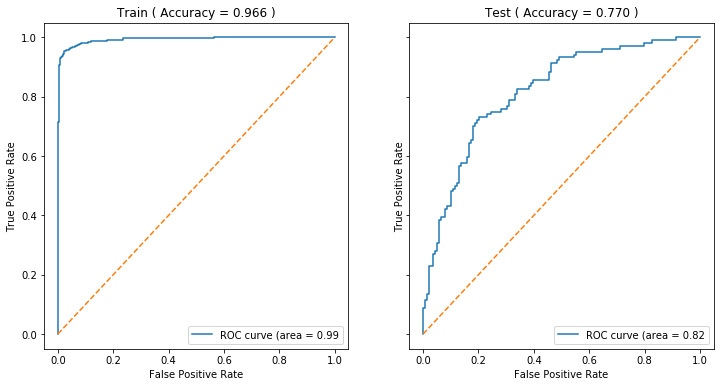

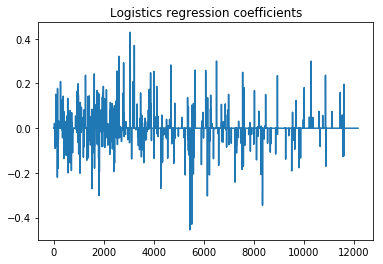

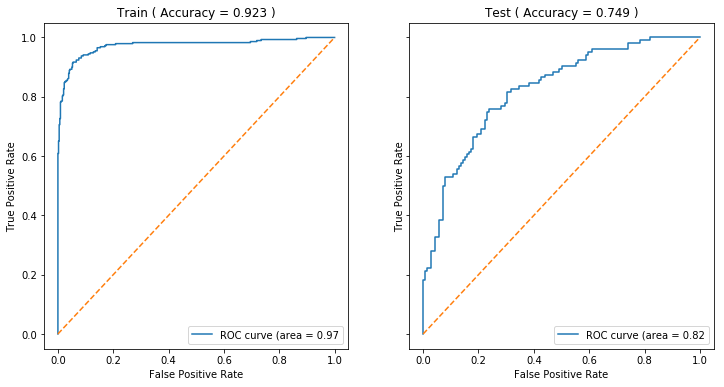

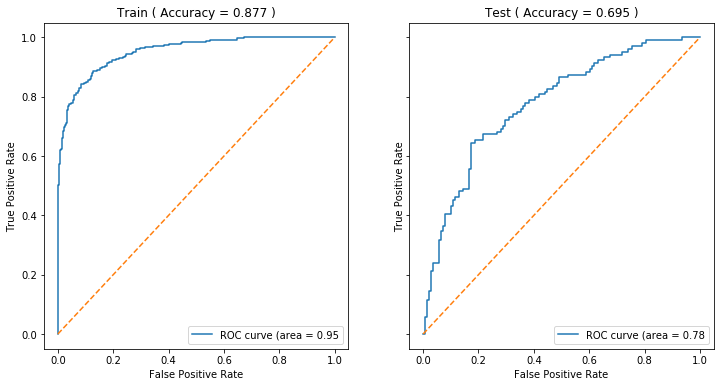

In [3]:
(clf_logit, clf_svm, clf_forest) = fit_models(X_train, y_train, X_test, y_test)

# Baic classifiers on standarized data

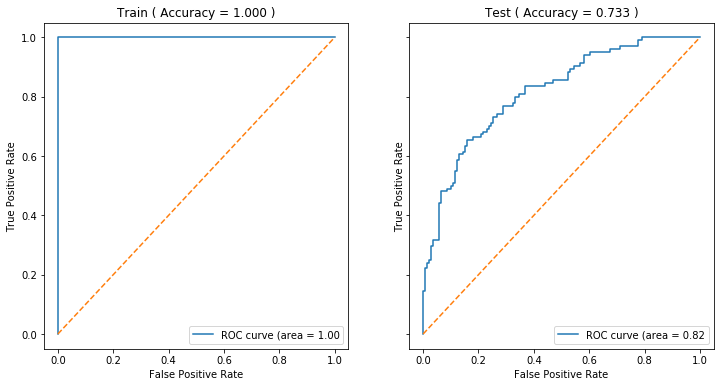

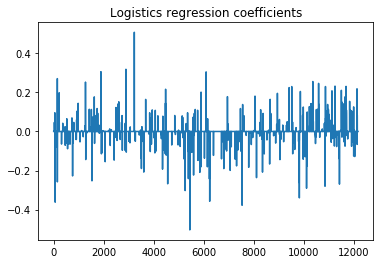

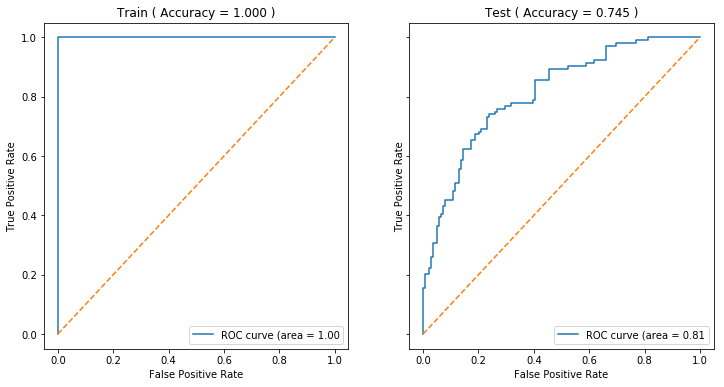

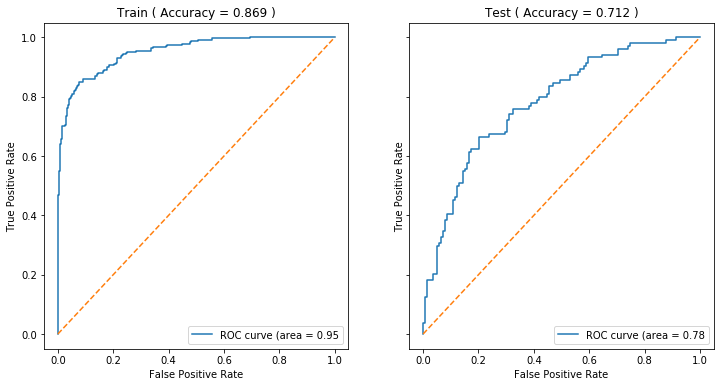

In [ ]:
(clf_logit, clf_svm, clf_forest) = fit_models(X_std_train, y_train, X_std_test, y_test)

# Data statistics

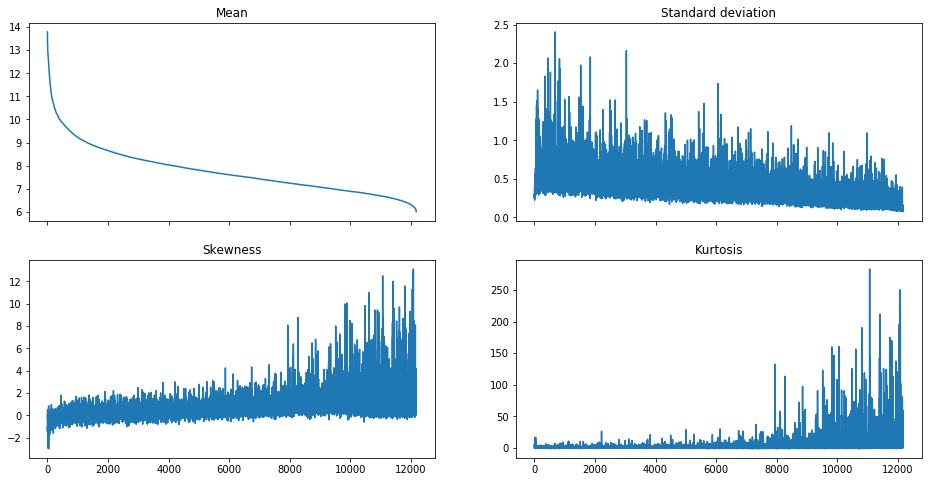

In [ ]:
from scipy.stats import skew, kurtosis

p = dataset.shape[1]
means = np.mean(dataset, axis=0)
stds = np.std(dataset, axis=0)
skews = skew(dataset, axis=0)
kurtoses = kurtosis(dataset, axis=0)

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize = (16,8), sharex=True)
(ax1, ax2, ax3, ax4) = np.array(axes).flatten()
ax1.plot(np.arange(p), means)
ax1.set_title("Mean")
ax2.plot(np.arange(p), stds)
ax2.set_title("Standard deviation")
ax3.plot(np.arange(p), skews)
ax3.set_title("Skewness")
ax4.plot(np.arange(p), kurtoses)
ax4.set_title("Kurtosis")
plt.show()

Indices of genes with maximum skewness and kutosis respectively: 12080 11067


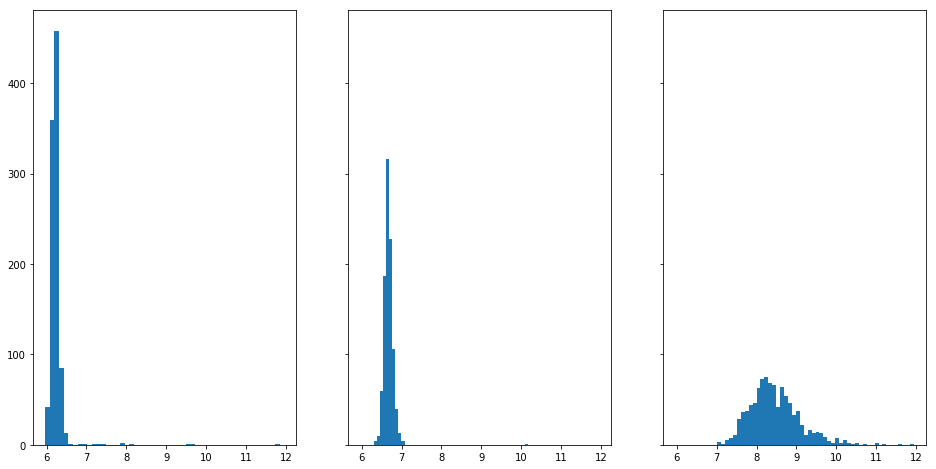

In [ ]:
skewness_max_index = np.argmax(skews)
kurtosis_max_index = np.argmax(kurtoses)

print('Indices of genes with maximum skewness and kutosis respectively: {} {}'.format(skewness_max_index, kurtosis_max_index))
bins = 50

fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (16,8), sharey=True, sharex=True)
(ax1, ax2, ax3) = np.array(axes).flatten()
ax1.hist(dataset[:, skewness_max_index], bins=bins)
ax2.hist(dataset[:, kurtosis_max_index], bins=bins)
ax3.hist(dataset[:, 2500], bins=bins)
plt.show()

In [ ]:
bins = 50

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (16,8), sharey=True)
(ax1, ax2) = np.array(axes).flatten()
ax1.hist(dataset[:, :8000], bins=bins)
ax2.hist(dataset[:, 8000:], bins=bins)
plt.show()